### Food Delivery Cost and Profitability Analysis is a comprehensive evaluation aimed at understanding and optimizing the financial dynamics of a food delivery operation. The goal is to identify areas where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability. 

In [50]:
import pandas as pd
food_orders = pd.read_csv("Food_orders_new_delhi.csv")
print(food_orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [51]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


# Preparing data preparation steps

In [52]:
import pandas as pd
from datetime import datetime

# Convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'], errors='coerce')
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'], errors='coerce')

# Function to extract discount values
def extract_discount(discount_str):
    if isinstance(discount_str, str):  # Ensure it's a string
        discount_str = discount_str.lower()  # Normalize case
        
        if 'flat' in discount_str:
            return float(discount_str.split(' ')[1])  # Extract the numeric value
        elif '%' in discount_str:
            return float(discount_str.split('%')[0])  # Extract the percentage
        
    return 0.0  # Default value if NaN or invalid data

# Apply the function to create a new 'Discount Percentage' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x) if pd.notna(x) else 0.0)

# Calculate discount amount based on type (percentage vs. flat)
food_orders['Discount Amount'] = food_orders.apply(
    lambda x: x['Order Value'] * x['Discount Percentage'] / 100  
    if x['Discount Percentage'] > 1 else x['Discount Percentage'], axis=1
)

# Print the result and data types
print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head())
print(food_orders.dtypes)


   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  0.0             0.00
4         1992         50 off Promo                  0.0             0.00
Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

# The data is now ready with the following adjustments:
Order Date and Time and Delivery Date and Time columns have been converted to datetime format.

A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.

Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

# Cost and Profitability Analysis

 **Delivery Fee :** The fee charged for delivering the order.

 **Payment Processing Fee:** The fee for processing the payment.

 **Discount Amount:** The discount provided on the order.


In [53]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 122691.85, 'Total Profit': 4298.15}


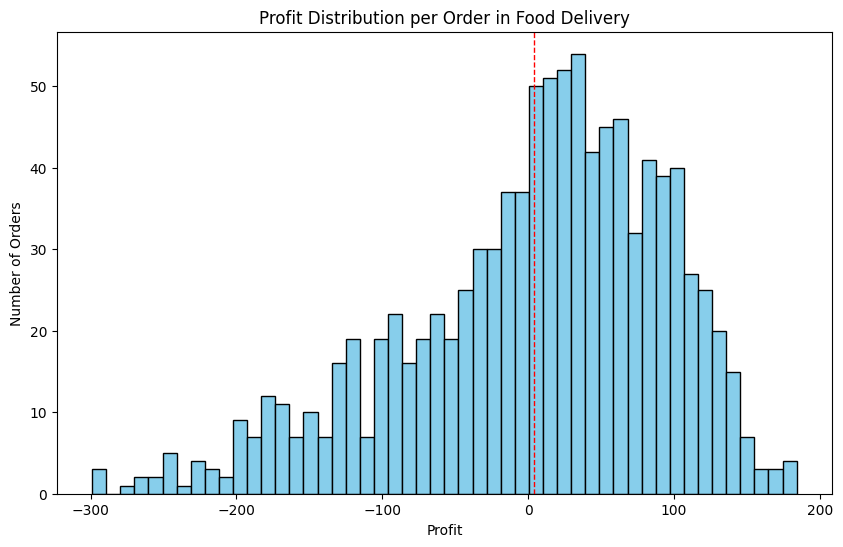

In [54]:
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a profit . The red dashed line indicates the average profit, which is in the positive territory, highlighting the overall profit-making situation.

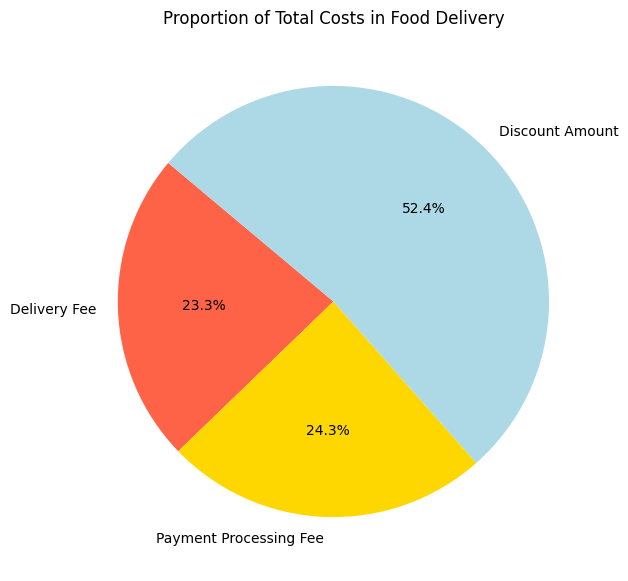

In [55]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

 comparing total revenue, total costs, and total profit (net profit in our case):

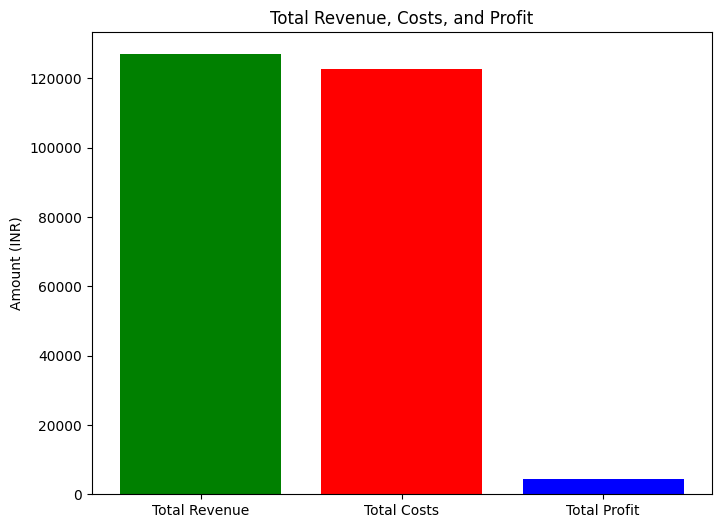

In [56]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [57]:
# Filter the dataset for profitable orders and create a new copy
profitable_orders = food_orders[food_orders['Profit'] > 0].copy()

# Avoid division by zero errors by replacing 0s in 'Order Value' with NaN
profitable_orders.loc[profitable_orders['Order Value'] == 0, 'Order Value'] = float('nan')

# Calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# Calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# Calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)


26.03934529020032 3.403010033444816


Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

Calculate the profitability per order using the actual discounts and commissions already present in the dataset.

Simulate profitability per order using the recommended discounts (6%) and commissions (30%) to see the potential impact on profitability.

This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders. 

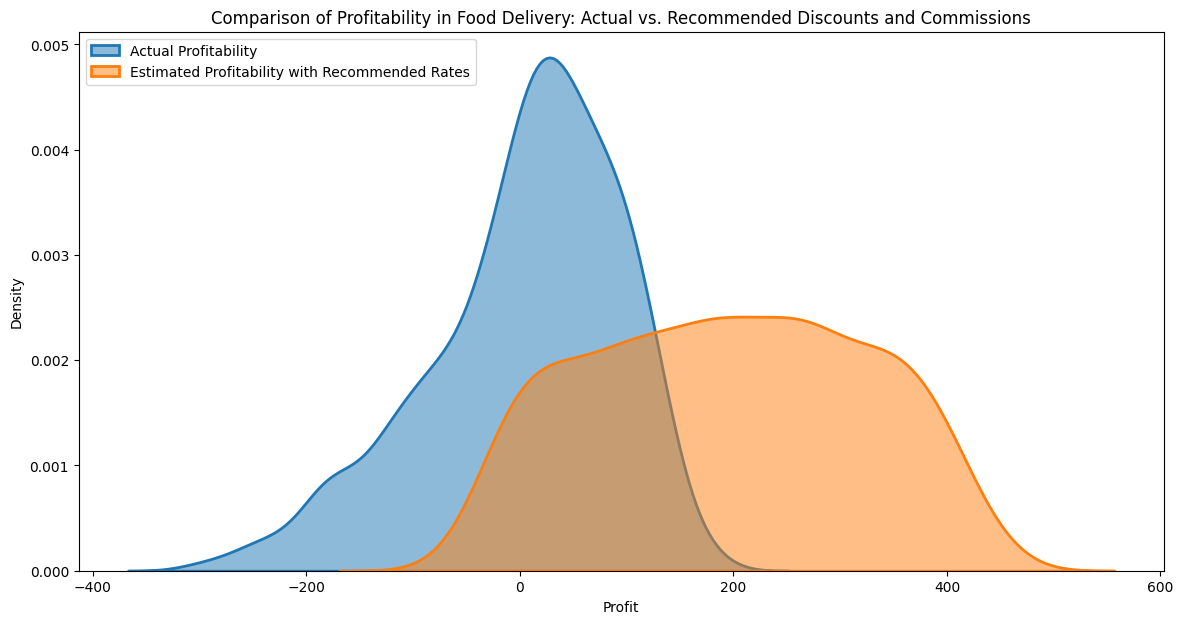

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define recommended commission and discount percentages
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0     # 6%

# Ensure no division by zero (replace 0 Order Values with NaN)
food_orders.loc[food_orders['Order Value'] == 0, 'Order Value'] = float('nan')

# Calculate simulated commission fee and discount amount
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# Recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

# Drop NaN values before plotting
cleaned_data = food_orders[['Profit', 'Simulated Profit']].dropna()

# Visualizing the comparison
plt.figure(figsize=(14, 7))

# Actual profitability
sns.kdeplot(cleaned_data['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# Simulated profitability
sns.kdeplot(cleaned_data['Simulated Profit'], label='Estimated Profitability with Recommended Rates',
            fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()
